<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

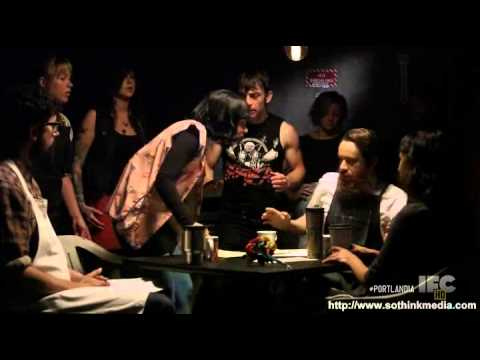

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/trevorjames/Unit/Unit4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [4]:
# reading in DF 
import pandas as pd

url = "./data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [170]:
# utilizing function from lecture to help inspect the most common words in tokens
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [18]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

### Next step
- reread in dataset in order to add column instead of writing over the original column 

In [52]:
shops = pd.read_csv(url)

In [54]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [109]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'coffee', 'place', 'star', 'rating', "it's", 'i', 'I' ])

In [55]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text']): 
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_punct == False) & (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [56]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, 1, check-in, love, love, loved, a..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, 1, check-in, listed, brunch, spot..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, 1, check-in, located, northcross, ..."


In [57]:
wc = count(shops['tokens'])

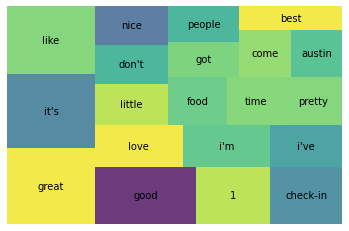

In [58]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Beginning by setting the star shop rating to a int in order to seperate the DF into "good" and "bad" coffee shops 

In [93]:
shops['star_rating'] = shops['star_rating'].str[:2].astype(int)

In [97]:
shops = shops.drop(columns='tokens_ratings')

In [179]:
shops.shape

(7616, 5)

In [180]:
shops['good_shops'] = shops['star_rating'].apply(lambda x: x >=4)

In [181]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas,good_shops
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,"[11/25/2016, 1, check-in, love, love, loved, a...","[11/25/2016, 1, Love, love, love, atmosphere, ...",True
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, Date, Night, Austin, Ambianc...",True
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,"[11/30/2016, 1, check-in, listed, brunch, spot...","[11/30/2016, 1, list, Brunch, Spots, love, ecl...",True
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor, drink, nice, seating...",False
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,"[12/3/2016, 1, check-in, located, northcross, ...","[12/3/2016, 1, locate, Northcross, mall, shopp...",True


In [105]:
bad_shops = shops[shops['star_rating'] <= 3]

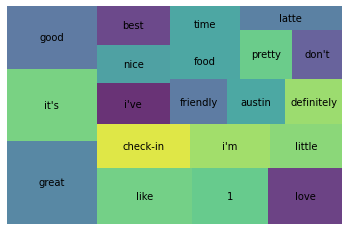

In [107]:
wc_good = count(good_shops['tokens'])
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

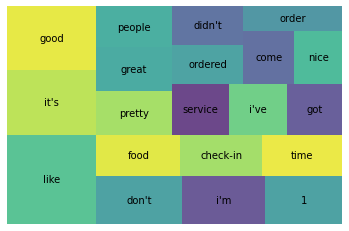

In [108]:

wc_bad = count(bad_shops['tokens'])
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Using lemmatization
- Now combining lemmatization we can get some better tokens in order to analyze whats makes coffee shops good and bad

In [182]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'coffee', 'place', 'star', 'rating', "it's", 'i', 'I', 'good', 'order', 'check', 'like', 'latte', 'come', 'great', 'drink', 'food', '$', '1' ])

In [183]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas



In [184]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [185]:
shops['lemmas'].head()

0    [11/25/2016, Love, love, love, atmosphere, cor...
1    [12/2/2016, list, Date, Night, Austin, Ambianc...
2    [11/30/2016, list, Brunch, Spots, love, eclect...
3    [11/25/2016, cool, decor, drink, nice, seating...
4    [12/3/2016, locate, Northcross, mall, shopping...
Name: lemmas, dtype: object

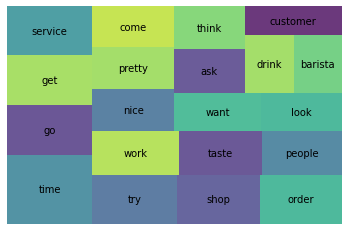

In [186]:
bad_shops = shops[shops['star_rating'] <= 3]
wc_bad = count(bad_shops['lemmas'])
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

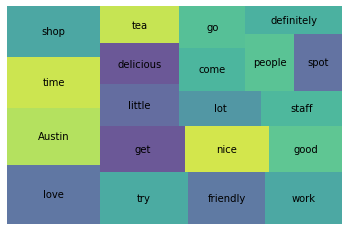

In [187]:
good_shops = shops[shops['star_rating'] > 3]
wc_good = count(good_shops['lemmas'])
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


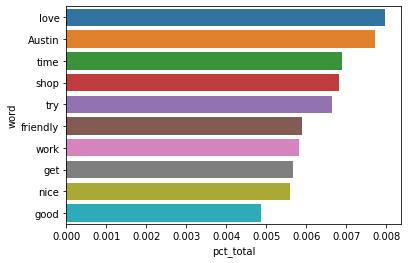

In [190]:
import seaborn as sns
# Plot of the most frequent words in good coffee shops
sns.barplot(wc_good['pct_total'][:10], wc_good['word'][:10]);

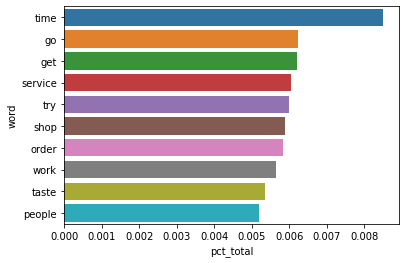

In [191]:
# Plot of the most frequent words in bad coffee shop reviews
sns.barplot(wc_bad['pct_total'][:10], wc_bad['word'][:10]);

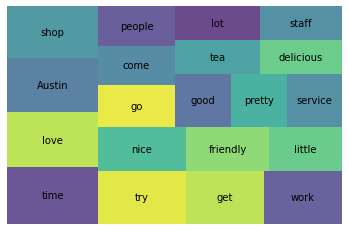

In [189]:
wc_combined = count(shops['lemmas'])
wc_top20 = wc_combined[wc_combined['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### In Summary
- The idea of creating tokens in order to analyze data is essentially fulifilling the idea of "cutting out the noise". We are looking for certain key words that directly correlte to an outcome. Here that is a positive review, or negative review. During my analysis I came across the difficulty of understanding what words should be kept and what words could be considered stop words. When considering what makes a coffee shop good or bad we need to consider some of the context of the review. Here we are trying to remove that context and only look at certain words in order to do that. When we look at a word 'time'. It is seen very frequently in both dataframes, when it comes to a review it can be seen as very different. 

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

